In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Load the data here and create a dataframe with the data

In [2]:
loaded = np.load('fashion_train.npy')
df = pd.DataFrame(loaded)

X are the pixels from the images and the target is the label

In [3]:
X = df.iloc[:, :784].copy()
target = df.iloc[:, 784].copy()

I SPLIT FOR NOW but we will change it when we use the test data set at the end, for now we work only with the training dataset to train AND test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 

In [5]:
def ourLDA(X, y):
    for col in X.columns:
        X[col] = StandardScaler().fit_transform(X[col].values.reshape(-1,1))
    mu = np.mean(X, axis=0).values.reshape(784, 1)
    mu_k = []
    for i,theClass in enumerate(np.unique(df.iloc[:, 784])):
        mu_k.append(np.mean(X.where(df.iloc[:, 784]==theClass),axis=0))
    mu_k = np.array(mu_k).T
    data_SW = []
    Nc = []
    for i,theClass in enumerate(np.unique(df.iloc[:, 784])):
        a = np.array(X.where(df.iloc[:, 784]==theClass).dropna().values-mu_k[:,i].reshape(1,784))
        data_SW.append(np.dot(a.T,a))
        Nc.append(np.sum(df.iloc[:, 784]==theClass))
    epsilon = 1e-6  # Small constant for regularization
    SW = np.sum(data_SW, axis=0) + epsilon * np.identity(X.shape[1])
    SB = np.dot(Nc * np.array(mu_k - mu), np.array(mu_k - mu).T)
    eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW), SB))
    eigen_pairs = [[np.abs(eigval[i]), eigvec[:, i]] for i in range(len(eigval))]
    eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
    w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
    Y = X.dot(w)
    return Y

We apply the standardsacler to standardize the values of the pixels

In [6]:
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))

Creates an array with the means from every class(we have 5 classes listed on the pdf)

In [7]:
mu = np.mean(X_train,axis=0).values.reshape(784,1)

In [8]:
mu_k = []

In [9]:
for i,trouser in enumerate(np.unique(df.iloc[:, 784])):
    mu_k.append(np.mean(X_train.where(df.iloc[:, 784]==trouser),axis=0))
mu_k = np.array(mu_k).T

We create the matrices for scatter within and scatter between, the scatter within is basically creating the mean of every class for all the features and the scatter between takes the means from all the classes and calculates the differences 

In [10]:
data_SW = []
Nc = []

In [11]:
for i,trouser in enumerate(np.unique(df.iloc[:, 784])):
    a = np.array(X_train.where(df.iloc[:, 784]==trouser).dropna().values-mu_k[:,i].reshape(1,784))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df.iloc[:, 784]==trouser))
SW = np.sum(data_SW,axis=0)
SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)

We calculate the eigen values and eigen vectors, luckily with numpy

In [12]:
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))

In [13]:
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real))

In [14]:
Y = X_train.dot(w)
Y

,0,1
7681,-0.416230,1.074502
9031,-2.126020,0.023541
3691,-3.341363,-0.360868
202,0.867954,-1.091912
5625,-3.279417,-0.464186
...,...,...
9225,0.875092,-1.312197
4859,0.717170,0.647902
3264,0.750461,-0.646862
9845,-0.013791,0.738850


We create the plot and display it, we have 5 classes so I chose the first 5 colors and shapes I found

/var/folders/mj/bqkpqbdj6g3451b084nmkq_h0000gn/T/ipykernel_93572/332380502.py:7: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax0.scatter(Y[0][y_train==l],


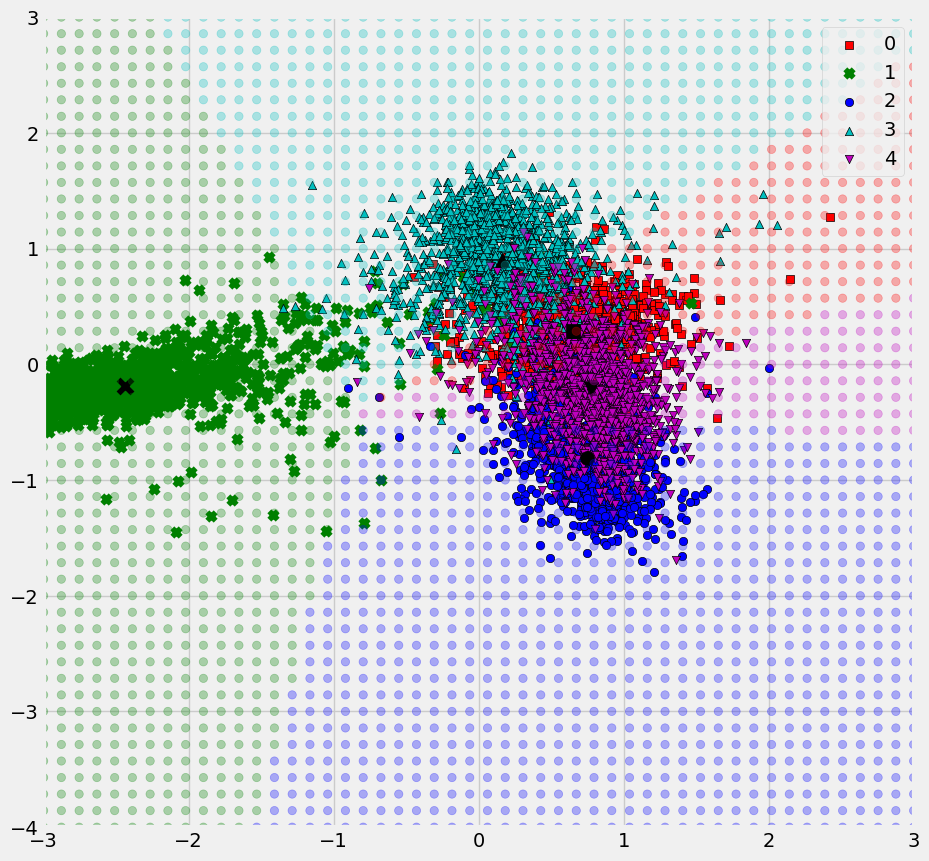

In [15]:
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g','b','c','m'],['s','x','o','^','v']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')

means = []

for m,target in zip(['s','x','o','^','v'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==target],axis=0))
    ax0.scatter(np.mean(Y[y_train==target],axis=0)[0],np.mean(Y[y_train==target],axis=0)[1],marker=m,c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []
for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))
NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b','c','m'])        
predictions = NN.predict(np.array(mesh))
ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)


plt.show()

Here we calculate LDA with the function from the library to check our results, I also flip the y and x axis since they were inverted compared to the one above.

In [16]:
LDA = LinearDiscriminantAnalysis(n_components=2)

In [17]:
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)

(7000, 2)


In [18]:
markers = ['s','x','o','^','v']
colors = ['r','g','b','c','m']

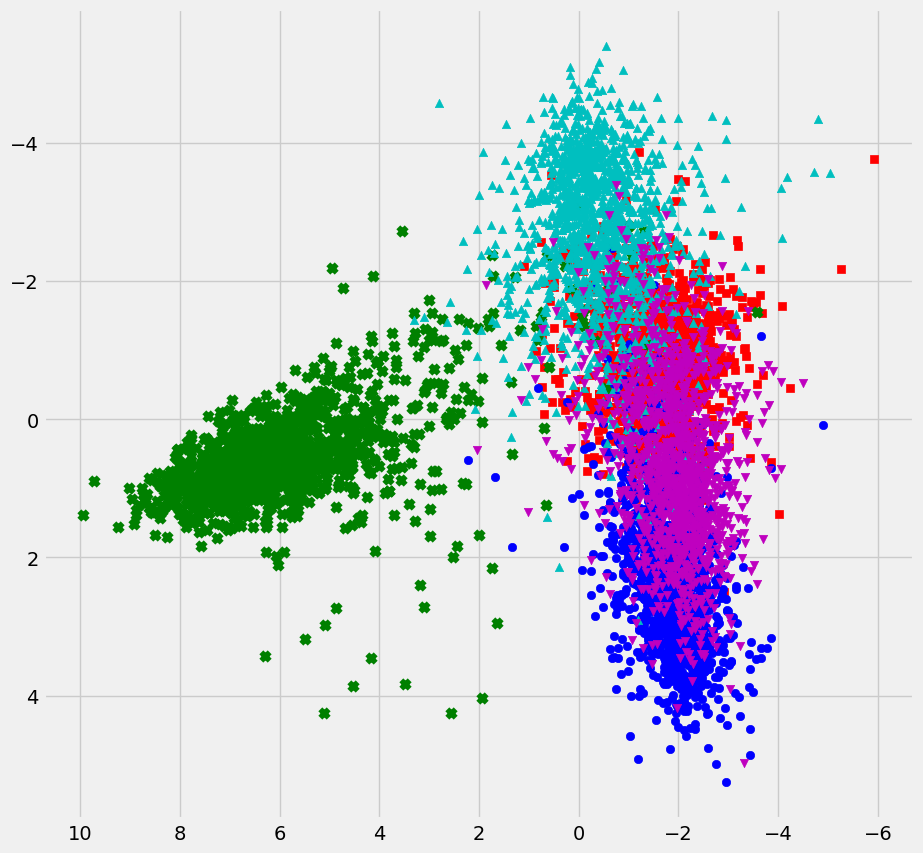

In [19]:
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,marker=m)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [20]:
X_train_lda = ourLDA(X_train, y_train)

In [21]:
X_test_lda = ourLDA(X_test, y_test)

In [22]:
class NaiveBayesHistogram:
    def __init__(self, binwidth=1.0):
        # Constructor initializes the NaiveBayesHistogram object with a given binwidth.
        self.binwidth = binwidth
        self.class_priors = None  # Placeholder for class priors
        self.histograms = None     # Placeholder for histograms
        self.classes = None        # Placeholder for unique classes

    def fit(self, X, y):
        # Fit method trains the Naive Bayes model using training data (X, y).
        self.classes = np.unique(y)  # Get unique classes in the target variable
        self.class_priors = {c: np.mean(y == c) for c in self.classes}  # Calculate class priors
        self.histograms = {c: [] for c in self.classes}  # Initialize histograms for each class

        for c in self.classes:
            class_data = X[y == c]  # Subset of data for the current class
            for feature_idx in range(class_data.shape[1]):
                # Iterate over each feature in the current class
                feature_values = class_data.iloc[:, feature_idx]
                hist, bin_edges = np.histogram(feature_values, bins='auto', density=True)
                # Compute histogram and bin edges for the feature
                self.histograms[c].append((hist, bin_edges))  # Store the histogram and bin edges

    def predict_sample(self, sample):
        # Predict the class for a single sample using the trained model.
        class_scores = {c: np.log(self.class_priors[c]) for c in self.classes}
        # Initialize scores with class priors (log probabilities)

        for c in self.classes:
            for feature_idx, feature_value in enumerate(sample):
                hist, bin_edges = self.histograms[c][feature_idx]
                binwidth = bin_edges[1] - bin_edges[0]

                # Avoid division by zero
                if binwidth == 0:
                    binwidth = 1e-10

                bin_index = np.digitize(feature_value, bin_edges, right=True)

                # Adjust bin_index if it's 0
                if bin_index == 0:
                    bin_index = 1

                # Avoid index out of bounds
                if bin_index == len(hist) or bin_index - 1 >= len(hist):
                    bin_index = len(hist) - 1

                density_estimate = hist[bin_index - 1] / (binwidth * np.sum(hist))

                # Avoid taking the log of zero
                if density_estimate > 0:
                    class_scores[c] += np.log(density_estimate)
                else:
                    class_scores[c] += np.log(1e-10)  # Add a small constant

        return max(class_scores, key=class_scores.get)  # Return the class with the maximum score

    def predict(self, X):
        # Predict the class labels for a set of samples (rows in X).
        predictions = [self.predict_sample(sample) for _, sample in X.iterrows()]
        # Apply predict_sample to each row in X
        return predictions


In [23]:
nb_histogram = NaiveBayesHistogram(binwidth=1.0)
nb_histogram.fit(X_train_lda, y_train)

In [24]:
predictions = nb_histogram.predict(X_test_lda)

In [25]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.31766666666666665
